In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


Bad key "text.kerning_factor" on line 4 in
C:\Users\dhananjayan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import streamlit as st


In [3]:

image =r"C:\Users\dhananjayan\Downloads\good-short-haircuts-for-men-comb-over.jpg"


In [4]:
image = cv2.imread(image)

In [5]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

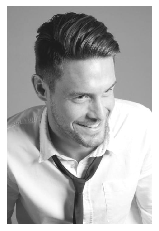

In [6]:
plt.imshow(image)
plt.axis('off');

In [7]:
prototxt = r"C:\Users\dhananjayan\projects\Photo_colorization\models\models_colorization_deploy_v2.prototxt"
model = r"C:\Users\dhananjayan\projects\Photo_colorization\models\colorization_release_v2.caffemodel"
points = r"C:\Users\dhananjayan\projects\Photo_colorization\models\pts_in_hull.npy"

In [8]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)
pts = np.load(points)

In [9]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

In [10]:
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

In [11]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

In [12]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

2020-11-07 17:51:23.654 WARNING matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


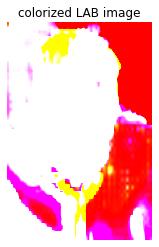

In [13]:
plt.imshow(colorized)
plt.axis('off');
plt.title('colorized LAB image');

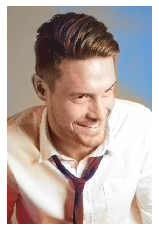

In [14]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized)
plt.axis('off');

In [15]:
cv2.imwrite(r"C:\Users\dhananjayan\projects\Photo_colorization\colored_images\colored_c19.jpg", cv2.cvtColor(colorized, cv2.COLOR_RGB2BGR))

True

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import streamlit as st


def colorizer(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    prototxt = r"C:\Users\dhananjayan\projects\Photo_colorization\models\models_colorization_deploy_v2.prototxt"
    model = r"C:\Users\dhananjayan\projects\Photo_colorization\models\colorization_release_v2.caffemodel"
    points = r"C:\Users\dhananjayan\projects\Photo_colorization\models\pts_in_hull.npy"
    net = cv2.dnn.readNetFromCaffe(prototxt, model)
    pts = np.load(points)
    class8 = net.getLayerId("class8_ab")
    conv8 = net.getLayerId("conv8_313_rh")
    pts = pts.transpose().reshape(2, 313, 1, 1)
    net.getLayer(class8).blobs = [pts.astype("float32")]
    net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]
    scaled = img.astype("float32") / 255.0
    lab = cv2.cvtColor(scaled, cv2.COLOR_RGB2LAB)
    resized = cv2.resize(lab, (224, 224))
    L = cv2.split(resized)[0]
    L -= 50
    net.setInput(cv2.dnn.blobFromImage(L))
    ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
    ab = cv2.resize(ab, (img.shape[1], img.shape[0]))
    L = cv2.split(lab)[0]
    colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
    colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
    colorized = np.clip(colorized, 0, 1)
    colorized = (255 * colorized).astype("uint8")
    return colorized
    


In [17]:
colorizer(r"C:\Users\dhananjayan\Downloads\good-short-haircuts-for-men-comb-over.jpg")

array([[[138, 138, 142],
        [138, 138, 142],
        [138, 138, 142],
        ...,
        [ 99, 145, 201],
        [ 99, 145, 201],
        [ 99, 145, 201]],

       [[138, 138, 142],
        [138, 138, 142],
        [138, 138, 142],
        ...,
        [ 99, 145, 201],
        [100, 146, 202],
        [100, 146, 202]],

       [[138, 138, 142],
        [138, 138, 142],
        [139, 139, 143],
        ...,
        [ 99, 145, 201],
        [100, 146, 202],
        [100, 146, 202]],

       ...,

       [[106,  40,  37],
        [108,  42,  39],
        [112,  45,  42],
        ...,
        [211, 207, 199],
        [210, 206, 198],
        [210, 206, 198]],

       [[107,  41,  38],
        [109,  43,  40],
        [112,  45,  42],
        ...,
        [211, 207, 199],
        [209, 205, 197],
        [209, 205, 197]],

       [[107,  41,  38],
        [109,  43,  40],
        [112,  45,  42],
        ...,
        [210, 206, 198],
        [212, 208, 200],
        [212, 208, 200]]

In [18]:
st.write("""
          # Colorize your image
          """
          )

st.write("This is an app to turn your photos into color")

file = st.sidebar.file_uploader("Please upload an image file", type=["jpg", "png"])

if file is None:
    st.text("You haven't uploaded an image file")
else:
    image = Image.open(file)
    img = np.array(image)
    
    #option = st.sidebar.selectbox(
    #'Which cartoon filters would you like to apply?',
    #('Pencil Sketch', 'Detail Enhancement', 'Pencil Edges', 'Bilateral Filter'))
    
    st.text("Your original image")
    st.image(image, use_column_width=True)
    
    st.text("Your colorized image")
    color = colorize(img)
    #cartoon = cartoonization(img, option)
    
    st.image(c, use_column_width=True)